# OpenCV Opdrachten
- Minor Applied Artificial Intelligence, Hogeschool van Amsterdam (AUAS)
- Docent:  Michiel Bontenbal 
- Datum: Vrijdag 9 februari 2024

### Doel van dit notebook
In dit Notebook leer je:

- hoe je randen in foto's kan detecteren ('Edge Detection)
- hoe je gezichten kan herkennen met Haar Cascade algoritme

### Wat je moet doen
- Maak de 8 oefeningen in het notebook
- Sla het notebook op in je Gitlab & maak aantekeningen in je logboek.

### Inhoud
0. Installeer en importeer de modules
1. Edge Detection met OpenCV
2. Detecteer gezichten met Haar Cascade
3. Gebruik je webcam

### Tutorial
 
**Geeks for Geeks tutorial**

https://www.geeksforgeeks.org/opencv-python-tutorial/

**OpenCV Python documentatie**

https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html


----
Acknowledgements: Stijn Oomes

## 0. Installeer en importeer de libraries

Als OpenCV niet is geïnstalleerd, installeer deze met onderstaand pip commando.

bron: https://pypi.org/project/opencv-python/

In [33]:
!pip install opencv-python

Importeer dan de volgende libraries:

- `opencv`
- `numpy`
- `matplotlib` 
- `PIL` 

In [34]:
#import the libraries
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [35]:
#print opencv version
print(cv2.__version__)

4.9.0


## 1. Edge Detection met OpenCV

OpenCV kan beelden inlezen, maar de MatPlotLibrary ook; vanwege heel rare en ingewikkelde problemen is het makkelijker om MatPlotLib te gebruiken. Gebruik het commando ```plt.imread('path-to-image')``` om een plaatje in te lezen.

Met MatPlotLib kan je dan ook het plaatje tonen in je notebook. Dit doe je met het commando ```imshow(image)```; ```plt.figure(figsize=(10,10))``` geeft de beeldverhoudingen aan, vierkant in dit geval, en ```plt.axis('off');``` zorgt dat er geen x- en y-as getekend worden, want dat zou er raar uitzien bij een plaatje.

Ons advies is om het plaatje 'speelgoed.jpg' te gebruiken. Deze kan je downloaden van DLO in dezelfde folder als dit notebook. Dan werkt onderstaande code erg goed. Als je wilt dan mag je zelf ook een eigen plaatje gebruiken. 


### Importeer en toon een .jpg afbeelding

Let op: de code werkt alleen met een .jpg of .jpeg plaatje. Dus géén .png gebruiken.
Wij adviseren het plaatje 'speelgoed.jpg' te gebruiken (zie DLO) want dat werkt heel mooi. Wil je een ander plaatje gebruiken, dan mag dat ook.

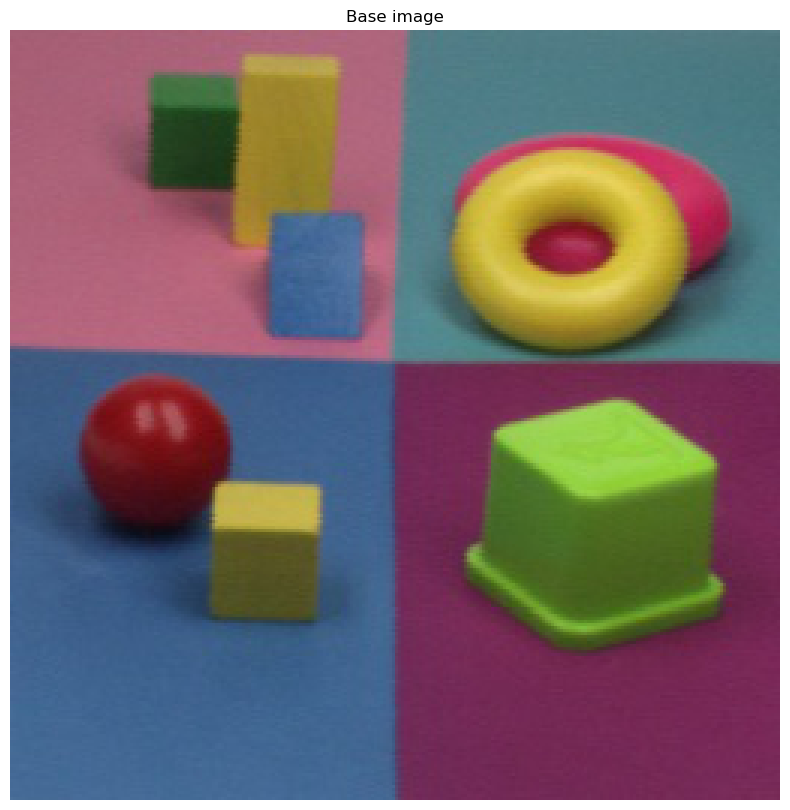

In [36]:
#CODE EXAMPLE
img = plt.imread('speelgoed.jpg')  # select image / change path 

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Base image')
plt.axis('off');

OpenCV heeft ook funkties om de kleur, kleurruimte, van plaatjes te veranderen; ```COLOR_RGB2GRAY``` gaat dus van RGB (kleur) naar gray (grijswaarden). Met het commando ```plt.imshow(gray, cmap='gray')``` zorg je ervoor dat er grijswaarden in de plot gebruikt worden, anders kiest matPlotLib een stadaard kleurenschema dat niet grijs is, een soort geel radarscherm kleurschema...

### OEFENING 1: Converteer je plaatje naar grijswaarden


Gebruik de Geeks for Geeks tutorial: https://www.geeksforgeeks.org/opencv-python-tutorial/

(-0.5, 255.5, 255.5, -0.5)

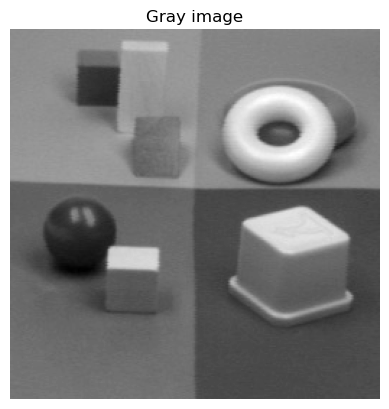

In [37]:
#YOUR CODE HERE
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Gray image')
plt.axis('off')

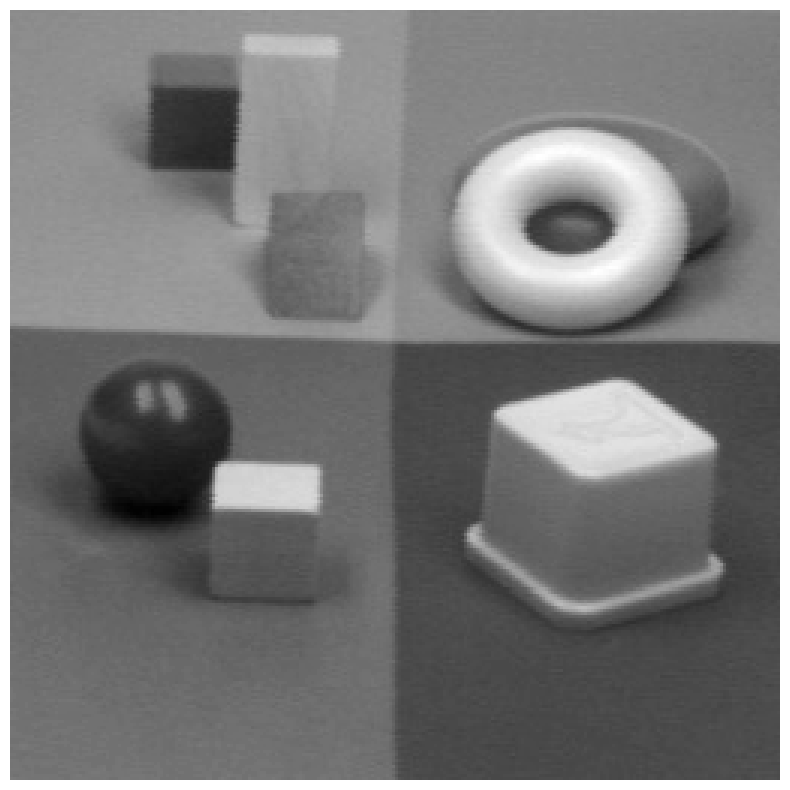

In [38]:
#CODE EXAMPLE: plot het plaatje met matplotlib
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
plt.axis('off');

### Detecteer de randen met het Canny algoritme

Een veel voorkomende bewerking in Computer Vision is het herkennen van randen in plaatjes. We gebruiken het Canny algoritme, omdat dat een van de meest gebruikte algoritmes is. Hoe Canny werkt kan je hier nalezen:

- https://nl.wikipedia.org/wiki/Canny-randzoeker
- https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
- https://www.geeksforgeeks.org/python-opencv-canny-function/

Het commando is ```cv2.Canny(gray, 10, 40)```, waarbij ```gray``` het input plaatje is, de 10 en 40 grenzen zijn wanneer een rand herkend wordt; je gaat in de oefening hier mee spelen. Deze waarden werken goed voor mijn plaatje en vast ook voor jou. Kijk in de documentatie van OpenCV hoe je de waarden kan aanpassen.

(-0.5, 255.5, 255.5, -0.5)

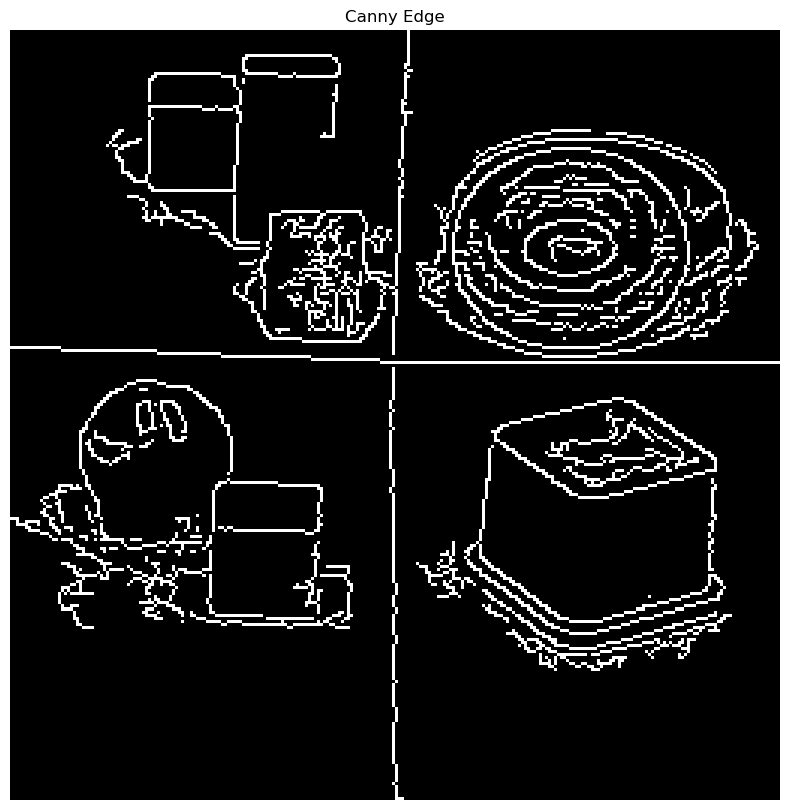

In [39]:
#CODE EXAMPLE
edges = cv2.Canny(gray, 10, 40)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge')
plt.axis('off')

### OEFENING 2 : Optimale waarden voor Canny Edge

Pas de waarden voor de canny edge detectie aan en laat het resultaat zien. Speel hier even mee!

(-0.5, 255.5, 255.5, -0.5)

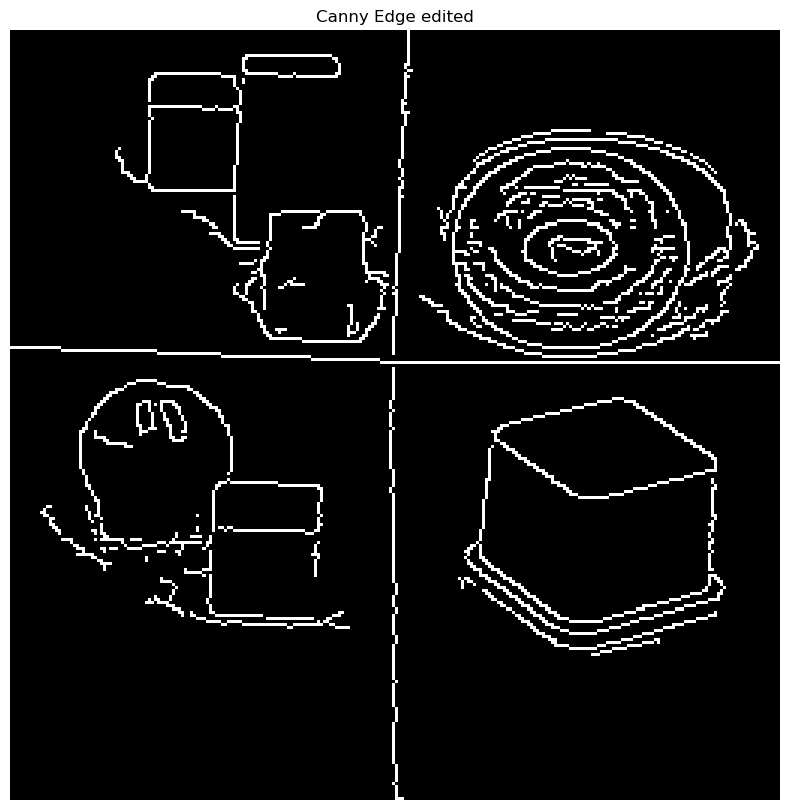

In [40]:
#YOUR CODE HERE
edges = cv2.Canny(gray, 20, 50)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge edited')
plt.axis('off')

In mijn verbeterde versie heb ik mijn `minVal` en `maxVal` parameters verhoogd. Nu heb ik een iets scherper beeld en minder 'ruis'. Dit gaat wel ten kosten van accuracy: sommige lijnen ziijn verdwenen, zoals de verticale lijn recht boven.

### Andere kleurruimtes: HSV

Zoals je gezien hebt, zitten er best wat *foute* edges bij. Ook maakt de edge detector geen onderscheid tussen schaduwrandenof highlights en de *echte* randen van het object.

Zouden we hier wat aan kunnen doen?

*HSV*, Hue, Saturation en Value, is een adere manier om kleuren te beschrijven; je kent het misschien van PhotoShop. 

- Hue is tint
- Saturation is hoeveel van die tint er in zit
- Value is de helderheid. 

Lees onderstaande voor een introductie op HSV:
- https://www.geeksforgeeks.org/hsv-color-model-in-computer-graphics/


### OEFENING 3: Converteer van RGB naar HSV waarden

Lees de volgende tutorial en zoek het commando op om je kleurenplaatje om te zetten van RGB => HSV waarden: 
- https://www.educba.com/opencv-hsv-range/

In [41]:
#YOUR CODE HERE
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)



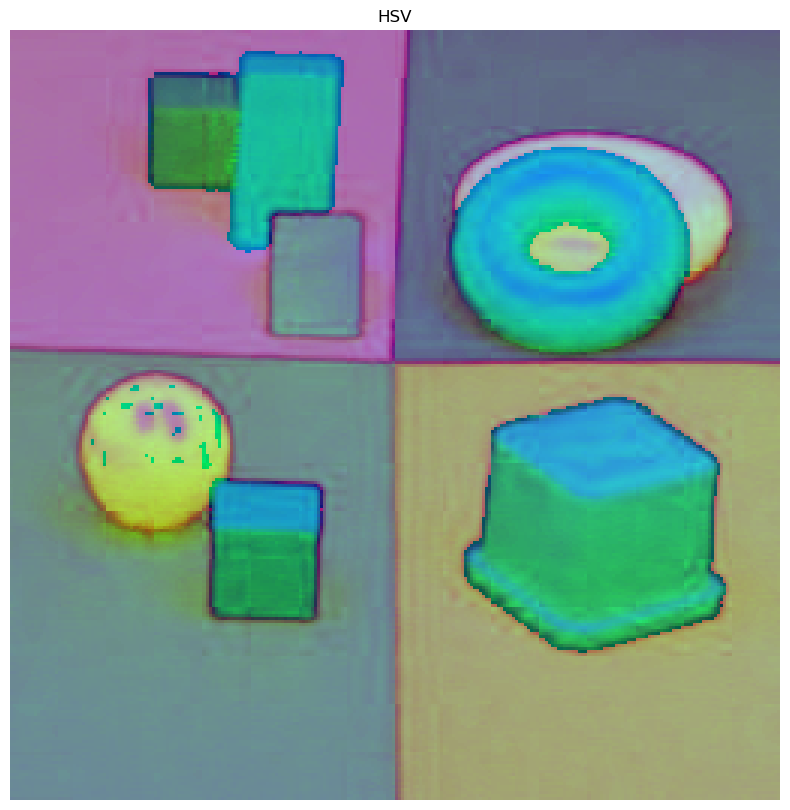

In [42]:
#plot the HSV-image
plt.figure(figsize=(10,10))
plt.imshow(hsv) #de naam van je hsv-plaatje
plt.title('HSV')
plt.axis('off');

Het wordt pas interessant wanneer we de kleur kanalen apart weergeven.

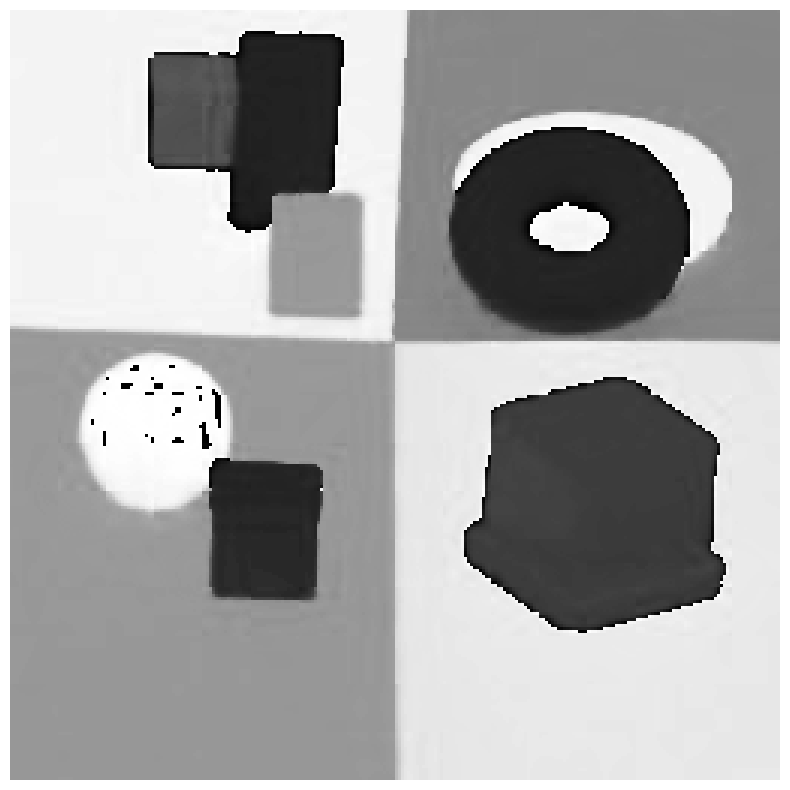

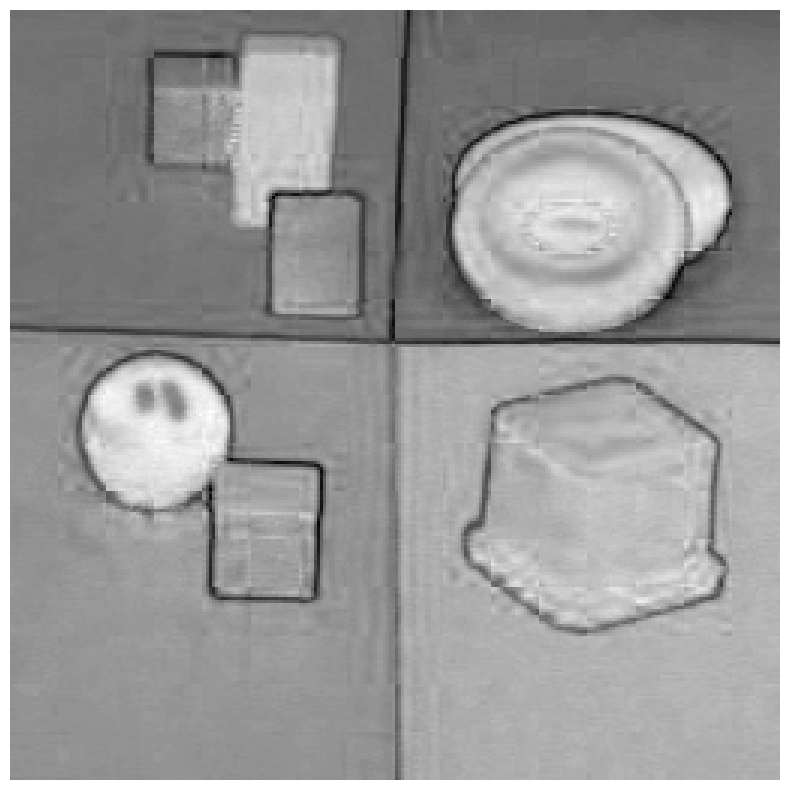

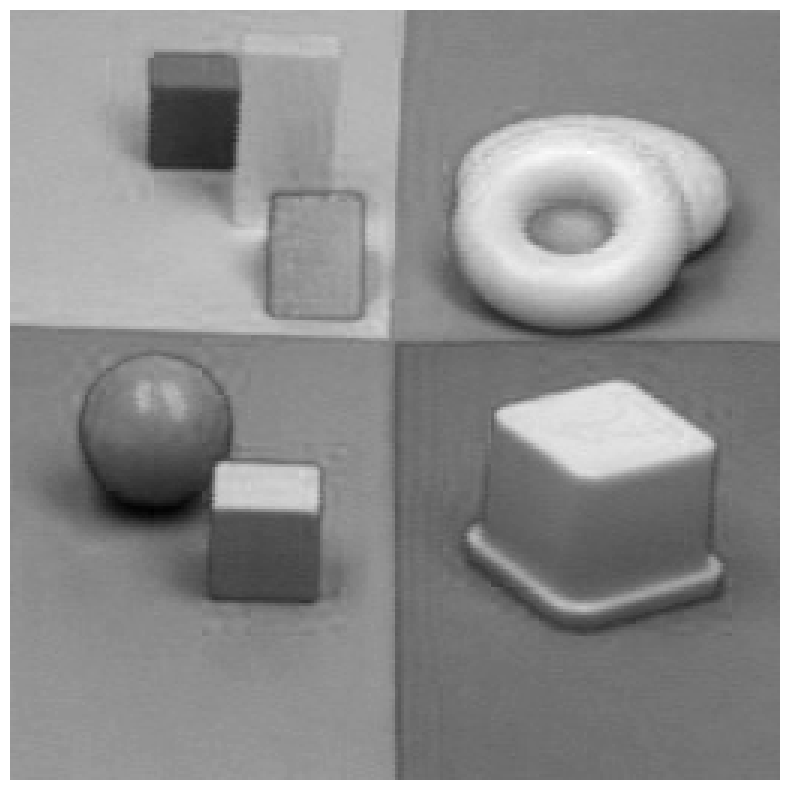

In [43]:
#CODE EXAMPLE: plot each channel separately
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,0], cmap='gray')
plt.axis('off');
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,1], cmap='gray')
plt.axis('off');
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,2], cmap='gray')
plt.axis('off');

Kijk wat er nu veranderd is, wanneer we Canny op de losse kleur kanalen toepassen.

(-0.5, 255.5, 255.5, -0.5)

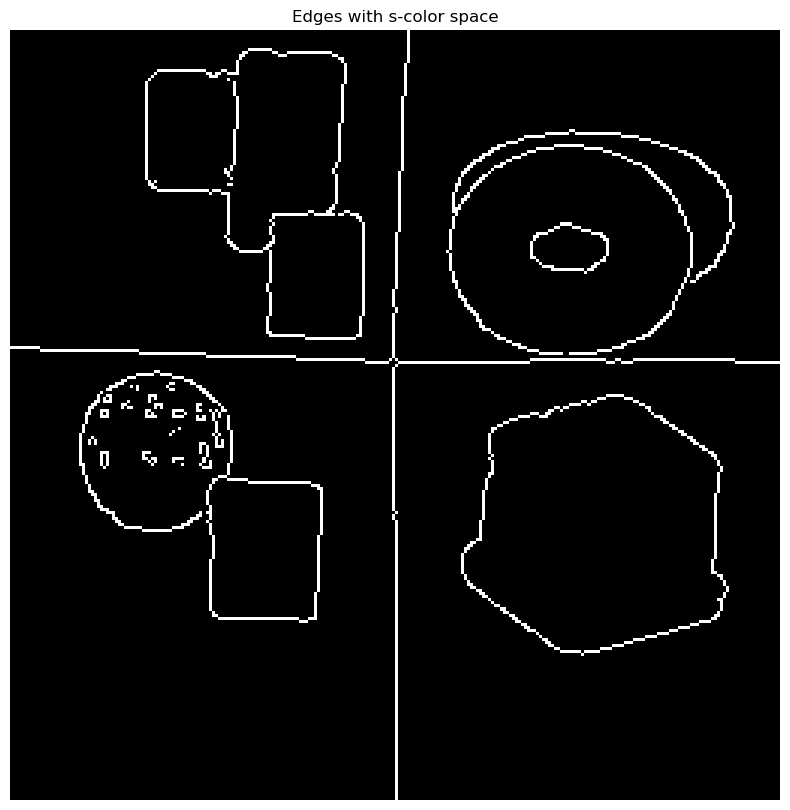

In [44]:
#CODE EXAMPLE. Exercise play with the parameters of v
s_edges = cv2.Canny(hsv[:,:,0], 100, 50) #change parameters 'lower' and 'upper' bounds to get optimal result

plt.figure(figsize=(10,10))
plt.imshow(s_edges, cmap='gray')
plt.title('Edges with s-color space')
plt.axis('off')

Nu dat wij de kleuren hebben aangepast van RBG naar HSV, is er meer contrast tussen de kleuren. Door middel van te kijken naar de verschillende kleuren kanalen, wordt het contrast *nog* hoger. Dit is natuurlijk alleen maar beter voor een model, want het is nu makkelijker om te zien waar de randen zijn.

Dit is ook duidelijk te zien in Canny op de HSV foto toepassen. De edges zijn veel duidelijker en er is amper ruis op de foto. Wel valt er wat 3d dementie weg uit de foto van de kubus rechts onder.

## 2. Detecteer gezichten met Haar Cascade

In het college hebben we gesproken over een (verouderde) technologie die jarenlang gebruikt is voor het herkennen objecten in gezichten: Haar Cascade. We gaan deze toch gebruiken, zodat jullie volgende week ook het verschil met moderne technieken als CNN gaan zien.


### OEFENING 4:  Zoek een plaatje en toon het
TO DO:
- Zoek een kleuren foto met 7 gezichten of meer.
- Laad de afbeelding in met de eerder gebruikte matplotlib code
- Laat de foto op het scherm zien. Zet axis op off en geef het plaatje een titel.
 

(-0.5, 611.5, 407.5, -0.5)

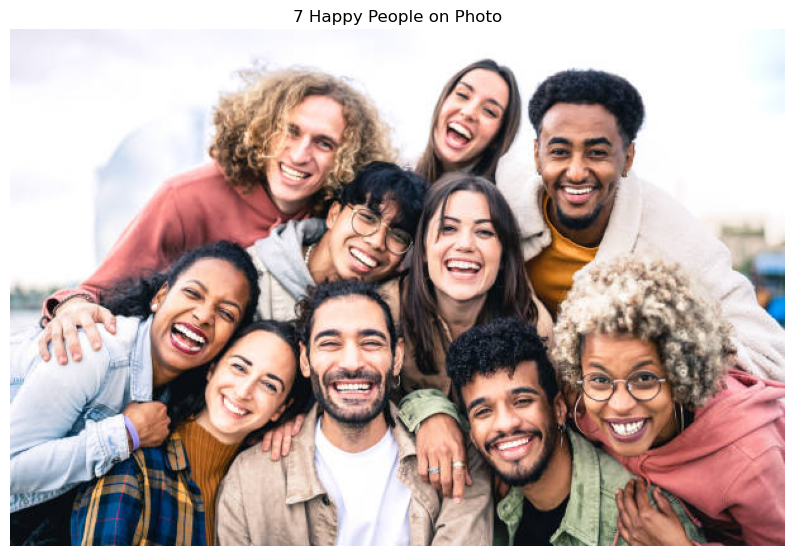

In [62]:
# YOUR CODE HERE
people = cv2.imread("7 new people.jpg")
people = cv2.cvtColor(people, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(people)
plt.title('7 Happy People on Photo')
plt.axis('off')

Welk datatype heeft de ingeladen afbeelding?

Hoe groot is de afbeelding in pixels?
Gebruik de code hieronder.

In [63]:
#print type and shape of image
print(type(people))
print(people.shape)

<class 'numpy.ndarray'>
(408, 612, 3)


Hier uit kan je zien dat de foto een numpy array is. Dit is handig, omdat wij nu de foto kunnen gebruiken voor allerlei dingen en functionaliteit. Ook zorgt dit ervoor dat de image compatible is met onze libraries.

met `people.shape` zie je de vorm van de image, met dus een breedte van 612px en een hoogte van 408px. 3 houdt in dat er 3 kleuren kanalen zijn in de foto.

### OEFENING 5: Zet een kleurenplaatje om in een grijswaarden plaatje.

(Als je foto al zwart-wit is dan kun je deze stap overslaan.)

Gebruik de code van oefening 1


(-0.5, 611.5, 407.5, -0.5)

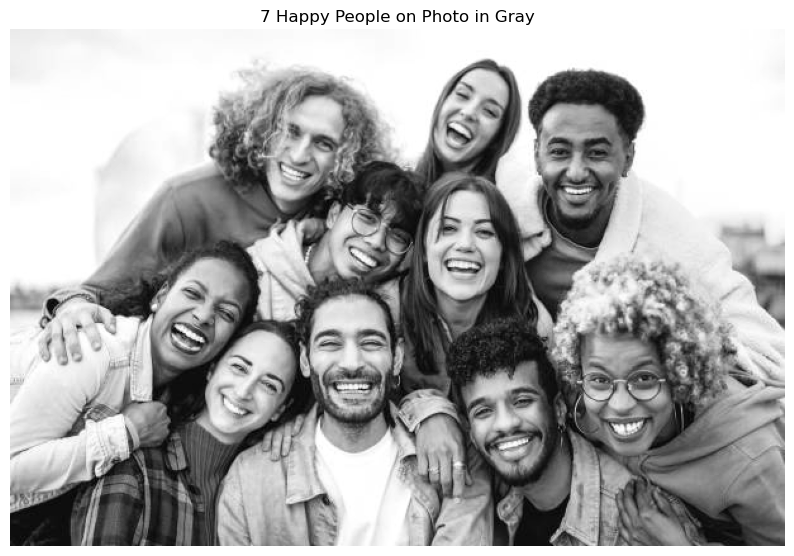

In [64]:
#YOUR CODE HERE
gray_people = cv2.cvtColor(people, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(gray_people, cmap='gray')
plt.title('7 Happy People on Photo in Gray')
plt.axis('off')

### Haar Cascade detector


Bekijk de eerste minuut van de volgende video waarin een Haar Cascade wordt gevisualiseerd:
https://vimeo.com/12774628

Haar Cascades gebruiken voorgetrainde modellen. Deze zijn in OpenCV te vinden via ```cv2.data.haarcascades``` method.

Een toelichting op Haar Cascade met code voorbeelden kun je hier vinden:
https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/


### OEFENING 6: Initieer de Haar Cascade detector

To do:
- initialiseer de Haar Cascade


In [48]:
# YOUR CODE HERE
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default(1).xml')

### OEFENING 7: Detecteer gezichten

Bepaal met de classifier ``face_cascade.detectMultiScale()`` de gezichten in het plaatje.

Link: https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/

Hoeveel heb je er gevonden?

In [65]:
# YOUR CODE HERE

faces = face_cascade.detectMultiScale(gray_people, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))

Hier maken wij gebruik van Haar Cascade om gezichten te herkennen in mijn foto. Dit doen we doormiddel van de `detectMultiScale` methode.

De `scaleFactor` parameter specificeert hoeveel de beeldgrootte wordt verkleind bij elke schaal van de beeldpiramide, wat bijdraat aan de schaak-invariate van het algoritme. Een `scaleFactorz` van 1.1 betekend dat de afbeelding met 10% wordt verkleind bij elke volgende schaal.

`minNeighbors`: Deze parameter specificeert het aantal buren dat elk rechthoekig kandidaat-gezicht moet hebben om het te behouden. Dit is een soort regulering parameter: hogere waarden leiden tot minder detecties maar met een hogere kwaliteit. Hier is het ingesteld op 4.

`minSize`: Dit is de minimale objectgrootte die wordt herkend. Objecten kleiner dan dat worden genegeerd. Hier is het ingesteld op 30x30 pixels.

Uiteindelijk geeft het een lijst terug met rechhoeken, waarin het denkt dat het gezichten in heeft gevonden.

In [66]:
#print shape[0] van de variable faces.
print("Aantal gezichten: " + str(faces.shape[0]))

Aantal gezichten: 8


In [67]:
# Inspecteer 'faces'. Wat geeft deze array weer denk je?
faces

array([[195,  57,  75,  75],
       [401,  58,  95,  95],
       [322, 130,  74,  74],
       [123, 184,  68,  68],
       [224, 211,  91,  91],
       [288, 282,  71,  71],
       [348, 264,  83,  83],
       [440, 243,  87,  87]], dtype=int32)

Hier zie je de coördinaten van de rechthoeken van de gevonden gezichten. Elk rechthoek wordt voorgesteld door een 4-tuple met de linkerbovenhoek (x, y) en de breedte en hoogte van de rechthoek.

### Toon rechthoeken om de gevonden gezichten

(-0.5, 611.5, 407.5, -0.5)

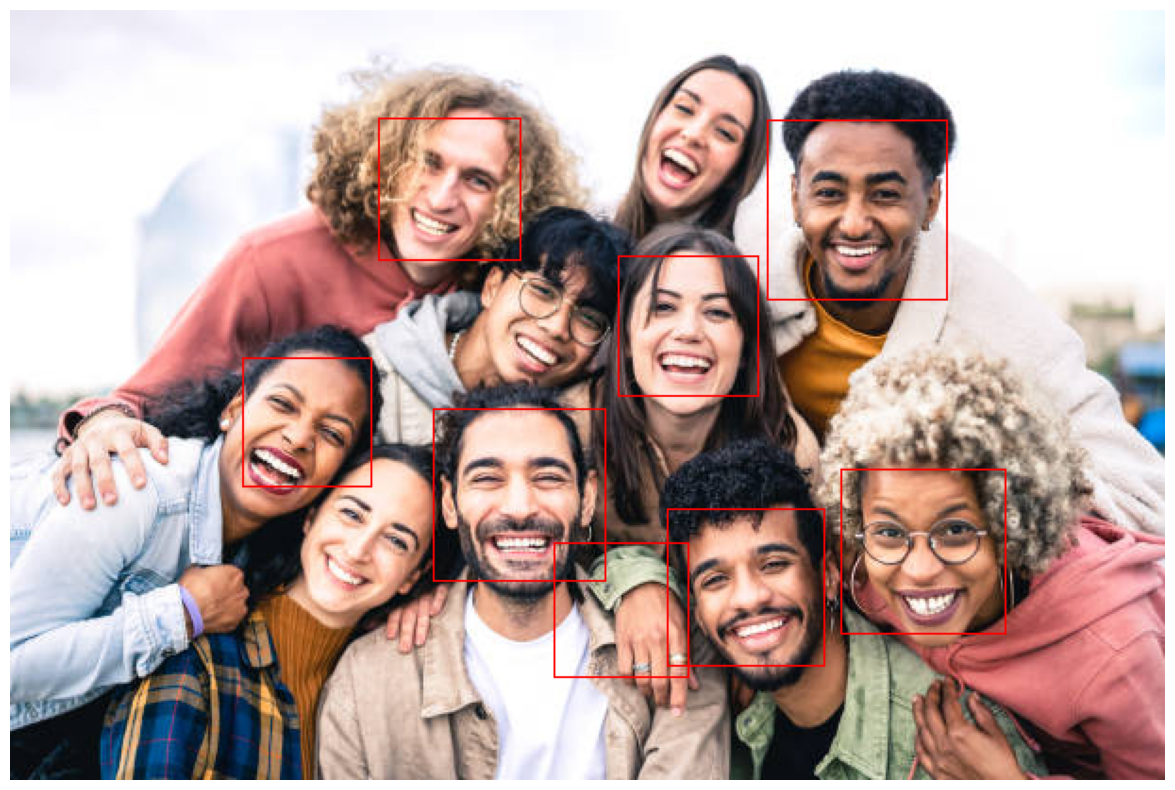

In [68]:
# CODE EXAMPLE to show faces

for (x,y,w,h) in faces:
    cv2.rectangle(people,(x,y),(x+w,y+h),(255,0,0),1) #maakt een rechthoek met de waarden 
    
plt.figure(figsize=(15,10))
plt.imshow(people)
plt.axis('off')

### Evalueer de resultaten

Vragen:
1. Hoe goed is jouw detector in vergelijking met wat je zelf ziet?
Zelf zie ik natuurlijk 10 gezichten op de foto, maar Haar Cascade ziet 8 gezichten. Waarvan er maar 7 kloppen. 1 gevonden gezicht is een hand, die blijkbaar dezelfde eigenschappen had als een gezicht volgens het model. Ook zijn er dus 3 gezichten niet gevonden.

2. Kun je de parameters van `face_cascade.detectMultiScale` varieren zodat de detectie beter wordt?
`scaleFactor`: Een kleinere scaleFactor verhoogt de kans dat kleinere gezichten worden gedetecteerd, maar kan de detectietijd verhogen en meer valse positieven opleveren.

`minNeighbors`: Het verhogen van minNeighbors kan helpen om valse positieven te verminderen, omdat een hogere waarde betekent dat elk potentieel gezicht moet worden gedetecteerd in meerdere nabije locaties om als echt gezicht te worden beschouwd. Echter, een te hoge waarde kan echte gezichten missen.

`minSize`: Het aanpassen van minSize kan helpen bij het detecteren van gezichten van verschillende groottes. Een kleinere minSize kan kleinere gezichten detecteren, maar kan ook leiden tot meer valse positieven.


To do: Maak hierover een aantekening in je logboek. 

### Detecteer ook de ogen en de mond

Hint: er zijn nog meer .xml files met detectoren

(-0.5, 611.5, 407.5, -0.5)

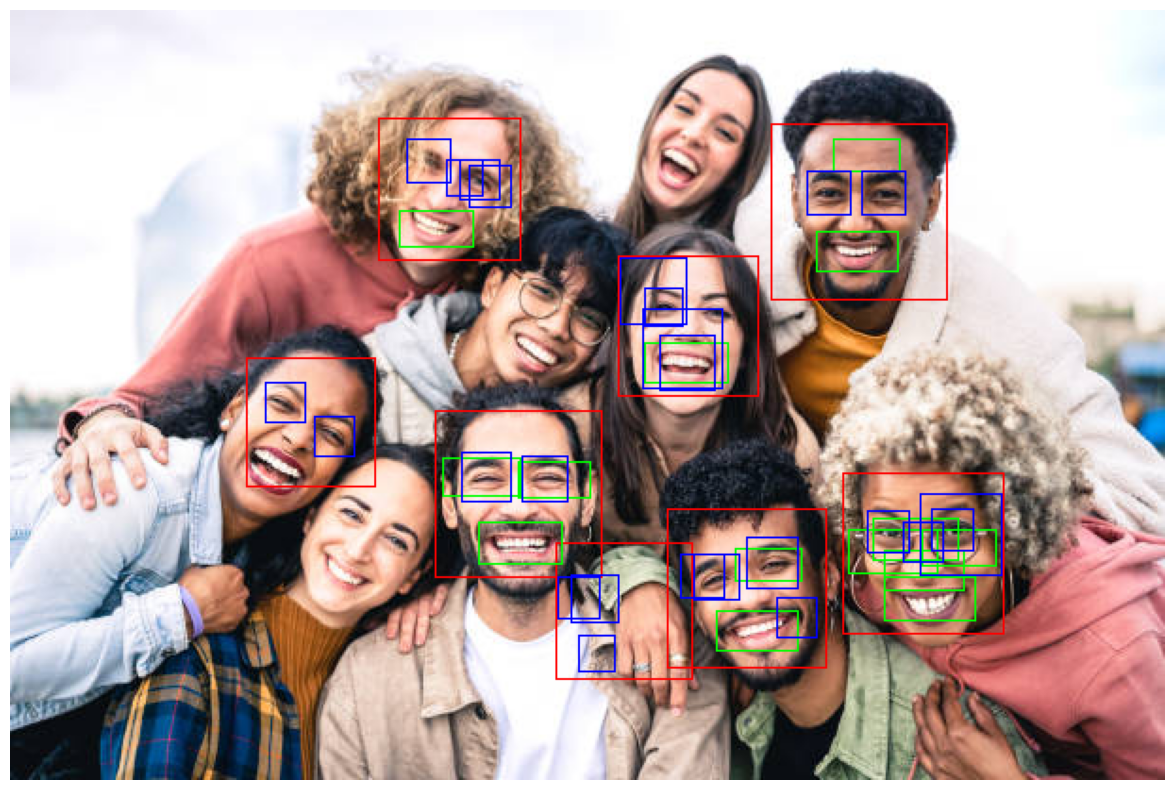

In [53]:
# CODE EXAMPLE
img2 = cv2.imread('7 new people.jpg') 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#change to name/path of your image

sc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
ec = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

for (x,y,w,h) in faces:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),1)

for (x,y,w,h) in faces:
    face = img2[y:y+h, x:x+w]
    face_gray = face[:,:,1]
    smiles = sc.detectMultiScale(face_gray, 1.1, 1, minSize=(5,5), flags=cv2.CASCADE_SCALE_IMAGE)
    eyes = ec.detectMultiScale(face_gray, 1.001, 1, minSize=(1,1), flags=cv2.CASCADE_SCALE_IMAGE)
    for smile in smiles:
        cv2.rectangle(face, smile, (0,255,0), 1)
    for eye in eyes:
        cv2.rectangle(face, eye, (0,0,255), 1)

plt.figure(figsize=(15,10))
plt.imshow(img2)
plt.axis('off')


Hier gebruiken we de `haarcascade_smile.mxl` en `haarcascade_eye.xml` om ogen en mond te herkennen binnen de gevonden gezichten. Dit doen we precies hetzelfde als eerst. Daarna tekenen we de gevonden ogen en monden in de gezichten op weer dezelfde manier.

### Bonus: Blur het gezicht
Zoek in de Geeks for Geeks tutorial onder 'projects' hoe je het gezicht kunt blurren.

(-0.5, 611.5, 407.5, -0.5)

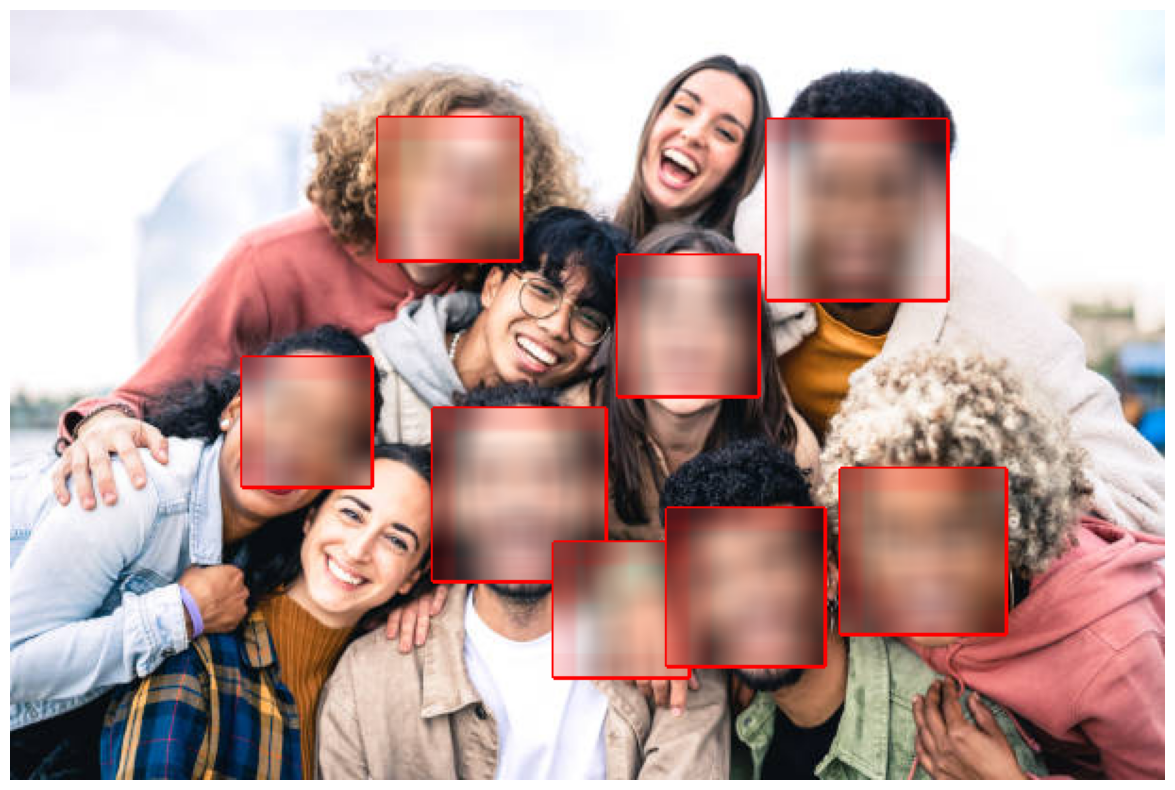

In [54]:
#YOUR CODE HERE
img2 = cv2.imread('7 new people.jpg') 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

face_detect = cv2.CascadeClassifier('haarcascade_frontalface_default(1).xml') 
face_data = face_detect.detectMultiScale(img2, 1.1, 4) 
  
# Draw rectangle around the faces which is our region of interest (ROI) 
for (x, y, w, h) in face_data: 
    cv2.rectangle(img2, (x, y), (x + w, y + h), (255, 0, 0), 2) 
    roi = img2[y:y+h, x:x+w] 
    # applying a gaussian blur over this new rectangle area 
    roi = cv2.GaussianBlur(roi, (23, 23), 30) 
    # impose this blurred image on original image to get final image 
    img2[y:y+roi.shape[0], x:x+roi.shape[1]] = roi 

plt.figure(figsize=(15,10))
plt.imshow(img2)
plt.axis('off')

Hier gebruiken we dezelfde code als eerst, we loopen over alle gevonden gezichten en met `cv2.GassianBlur` wordt er een blur over gedaan en dat toegevoegd aan het originele plaatje.

## 3. Gebruik de webcam

De opencv library wordt (nog steeds) veel gebruikt voor het maken van opnames met een webcam. 

Zoek in de documentatie van de ``OpenCV`` library naar ``VideoCapture()``. 

Hint: gebruik de Geeks for Geeks tutorial: https://www.geeksforgeeks.org/opencv-python-tutorial/?ref=lbp  

### OEFENING 8: Maak een script waarbij je de camera aanroept

In [69]:
# YOUR CODE HERE
# Create a VideoCapture object
import cv2

cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened(): 
    print("Unable to read camera feed")

while(True):
    ret, frame = cap.read()
    if ret:
        # Display the resulting frame
        cv2.imshow('frame', frame)
        
        # Press Q on keyboard to stop recording
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the video capture and video write objects
cap.release()

# Closes all the frames
cv2.destroyAllWindows() 

# Afronding

1. Sla het ingevulde notebook op in je portfolio op GitLab - Minor Logboek AAI.
2. Maak een aantekening in je logboek
3. Werk je Bloom tabel bij.